## Web Scraping

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import pandas as pd

import requests
from bs4 import BeautifulSoup


import time
import datetime

In [3]:
 headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}


def P_news_scraper(maxpage):
    
    news_df = pd.DataFrame(columns=("Title", "Datetime", "Article"))
    index = 0 
        
    page = 1
    maxpage_t =(int(maxpage)-1)+1  

    
    while page <= maxpage_t:
        
        url = 'https://search.mt.co.kr/searchNewsList.html?srchFd=TOTAL&range=IN&reSrchFlag=&preKwd=&search_type=m&kwd=ESG&bgndt=20210427&enddt=20220427&category=MTNW&sortType=allwordsyn&subYear=&category=MTNW&subType=mt'+'&pageNum='+str(page)
        
        req = requests.get(url)
        
        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')
        
        for urls in soup.select("div.section div.con > strong.subject > a"):
            
            try:
                if urls["href"].startswith("https://news.mt.co.kr/"):    
                        
                        newsreq = requests.get(urls["href"], headers = headers) #  
                        
                        bsoup = BeautifulSoup(newsreq.content, 'html.parser')
                        
                        title = bsoup.select('h1.subject')[0].text       
    

                        newsdate = bsoup.select('li.date')[0].get_text()[:10]


                        btext = bsoup.select('#textBody')[0].get_text().replace('\n', " ").replace('\t', " ")
                        article = btext.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
                    
                        
                        news_df.loc[index] = [title, newsdate, article]
                        index += 1              
                                            

            except Exception as e:
                continue
        page += 1
    
    return news_df 

news_df = P_news_scraper(10)


In [4]:
news_df.shape

(200, 3)

In [5]:
news_df.head(5)

,Title,Datetime,Article
0,"주한영국대사관, '한·영 클린테크 비즈니스 콘퍼런스' 개최",2022.04.27,"주한영국대사관은 전북테크노파크와 탈탄소 산업 혁신과 관련 산업 육성, 미래 클..."
1,"ESG 보고서 발간 건수, 국민연금 거래증권사 선정 당락 가른다",2022.04.27,임종철 디자인기자 /사진=임종철 디자인기자 ESG(환경·사회·지배구조) 관련 분...
2,"바이루트, 에이치엔비웰과 ESG 경영 강화을 위한 업무 협약",2022.04.27,허태욱 바이루트 대표(사진 왼쪽)와 김용수 에이치엔비웰 대표가 업무 협약을 체결하...
3,"[더벨]휴림로봇, ‘넷제로 2050 기후재단’ 주최 포럼 참가",2022.04.27,"더벨'머니투데이 thebell'에 출고된 기사입니다. 휴림로봇 (2,915원 ..."
4,"""원전 2년에 1개씩 짓는다""...유럽이 다시 원전에 꽂힌 이유",2022.04.27,정재훈 한국수력원자력 사장(한국원자력산업협회장·왼쪽 일곱번째)을 포함한 참석자들이...


In [6]:
news_df.tail(5)


,Title,Datetime,Article
195,"이창양 산업장관 후보자 ""무거운 책임감…규제 혁파할 것""",2022.04.10,"이창양 산업통상자원부 장관 후보자 이창양 산업부장관 후보자가 10일 ""인사청문회..."
196,[프로필]尹정부 첫 산업장관 이창양…OB출신의 팔방미인,2022.04.10,이창양 산업통상자원부 장관 후보자 /사진제공=대통령직 인수위원회 윤석열 정부 ...
197,한덕수 총리 후보자 19억 고문료 논란…로펌 고문들 무슨일 하길래,2022.04.09,한덕수 국무총리 후보자/사진=뉴시스 한덕수 국무총리 후보자가 새 정부 초대 총리...
198,"커피베이, 꾸준한 사회공헌활동 통해 ESG 경영 실천",2022.04.08,대한상공회의소 조사 결과에 따르면 MZ세대 10명 가운데 6명(64.5%)은 더...
199,"계명대, 지속 가능한 성장 위해 ESG경영 도입",2022.04.08,계명대학교가 지난 7일 성서캠퍼스 산학협력관에서 '제1회 계명ESG 실행위원회...


In [7]:
# file 저장
file_path =  "/content/gdrive/My Drive/Colab Notebooks/TXTData/"

file_name = "머니투데이_뉴스_" + "ESG" + ".csv"

file_full_path = file_path + file_name

news_df.to_csv(file_full_path ,  index = False, encoding="utf-8-sig")  

## Analyze & Visualization

In [8]:
!sudo apt-get install -y fonts-nanum    # 글꼴 설치
!sudo fc-cache -fv                      
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import  matplotlib 
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt


print('◎ matplotlib version : ', matplotlib.__version__)
print()


sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]

◎ matplotlib version :  3.2.2



['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

In [3]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)       # Nanum 폰트 세팅 

fm._rebuild()

◎ 폰트 이름 :  NanumGothic


In [4]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 8.1 MB/s 
     |████████████████████████████████| 453 kB 47.9 MB/s 


In [5]:
import numpy as np                   
import pandas as pd                 
import matplotlib.pyplot as plt      

from konlpy.tag import Kkma 
from konlpy.tag import Okt 

from wordcloud  import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer



import warnings
warnings.filterwarnings('ignore')

### 1) Using CountVectorizer

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [7]:
news = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/TXTData/머니투데이_뉴스_ESG.csv")
news.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     200 non-null    object
 1   Datetime  200 non-null    object
 2   Article   200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [8]:
news.head()

,Title,Datetime,Article
0,"주한영국대사관, '한·영 클린테크 비즈니스 콘퍼런스' 개최",2022.04.27,"주한영국대사관은 전북테크노파크와 탈탄소 산업 혁신과 관련 산업 육성, 미래 클..."
1,"ESG 보고서 발간 건수, 국민연금 거래증권사 선정 당락 가른다",2022.04.27,임종철 디자인기자 /사진=임종철 디자인기자 ESG(환경·사회·지배구조) 관련 분...
2,"바이루트, 에이치엔비웰과 ESG 경영 강화을 위한 업무 협약",2022.04.27,허태욱 바이루트 대표(사진 왼쪽)와 김용수 에이치엔비웰 대표가 업무 협약을 체결하...
3,"[더벨]휴림로봇, ‘넷제로 2050 기후재단’ 주최 포럼 참가",2022.04.27,"더벨'머니투데이 thebell'에 출고된 기사입니다. 휴림로봇 (2,915원 ..."
4,"""원전 2년에 1개씩 짓는다""...유럽이 다시 원전에 꽂힌 이유",2022.04.27,정재훈 한국수력원자력 사장(한국원자력산업협회장·왼쪽 일곱번째)을 포함한 참석자들이...


In [9]:
news['Article']

0         주한영국대사관은 전북테크노파크와 탈탄소 산업 혁신과 관련 산업 육성, 미래 클...
1       임종철 디자인기자 /사진=임종철 디자인기자  ESG(환경·사회·지배구조) 관련 분...
2       허태욱 바이루트 대표(사진 왼쪽)와 김용수 에이치엔비웰 대표가 업무 협약을 체결하...
3        더벨'머니투데이 thebell'에 출고된 기사입니다.  휴림로봇 (2,915원 ...
4       정재훈 한국수력원자력 사장(한국원자력산업협회장·왼쪽 일곱번째)을 포함한 참석자들이...
                             ...                        
195     이창양 산업통상자원부 장관 후보자  이창양 산업부장관 후보자가 10일 "인사청문회...
196     이창양 산업통상자원부 장관 후보자 /사진제공=대통령직 인수위원회   윤석열 정부 ...
197     한덕수 국무총리 후보자/사진=뉴시스  한덕수 국무총리 후보자가 새 정부 초대 총리...
198      대한상공회의소 조사 결과에 따르면 MZ세대 10명 가운데 6명(64.5%)은 더...
199       계명대학교가 지난 7일 성서캠퍼스 산학협력관에서 '제1회 계명ESG 실행위원회...
Name: Article, Length: 200, dtype: object

In [10]:
print(news['Article'][100])

 한편 KB자산운용은 신재생에너지와 국내 환경시설에 투자하는 ESG 분야 투자 규모가 2조2000억원을 넘어선다. 풍력발전, 연료전지·바이오에너지 생산, 폐기물 처리, 학교 시설개선 등 투자분야도 다양하다. 이번 전기차 충전소 구축에 이어 향후 수소차 분야 등에 투자가 예정돼 있어 연내 3조 돌파도 가능할 것으로 기대된다.                                    


In [11]:
okt = Okt()  # 한글 형태소 분석기 불러오기 (i.e. 실행을 위한 객체 만들기)   
# okt = Kkma()  # 한글 형태소 분석기 불러오기 (i.e. 실행을 위한 객체 만들기)   


# 두 음절 이상의 명사만 추출하는 함수를 정의 =============================

def tokenizer(text):
    nouns = okt.nouns(text)    # 해당 칼럼에서 명사만 추출 
    return [noun for noun in nouns if len(noun) > 1]    # 두 음절 이상의 명사만 다시 추출하여 반환  

In [12]:
count_vectorizer = CountVectorizer(tokenizer=tokenizer)   

# 처리 대상 컬럼은 'Article' 컬럼 (신문기사 본문) 
# fit method 는 전체 문서의 'Article' 칼럼에 등장한 모든 단어들의 리스트를 만들고 단어마다 인덱스를 부여함

count_vectorizer.fit(news['Article'])


# 위의 fit 메소드를 이용해 구한 단어를 처음부터 20개의 단어를 출력하고 확인

print('▶ 처음부터 20개의 단어를 출력 = \n', count_vectorizer.get_feature_names()[ : 20])   
print()

print(count_vectorizer.vocabulary_)    # (단어 & 단어 인덱스값) 의 pair 형태로 단어 사전이 출력됨  
print()


▶ 처음부터 20개의 단어를 출력 = 
 ['가가', '가게', '가격', '가계', '가계부채', '가공', '가구', '가기', '가까이', '가능', '가능성', '가동', '가량', '가려움', '가로', '가맹', '가미', '가방', '가사', '가산']

{'영국': 3237, '대사관': 1084, '전북': 4116, '테크노': 5095, '파크': 5212, '탄소': 5057, '산업': 2240, '혁신': 5598, '관련': 464, '육성': 3574, '미래': 1639, '클린': 5032, '성장': 2459, '가속': 28, '협력': 5617, '기회': 733, '모색': 1542, '테크': 5094, '비즈니스': 2137, '콘퍼런스': 5007, '진행': 4596, '지난': 4503, '전주': 4143, '호텔': 5647, '이번': 3679, '행사': 5565, '지역': 4533, '기업': 705, '프로젝트': 5376, '일환': 3868, '기반': 694, '수소': 2617, '해상': 5544, '풍력': 5355, '모빌리티': 1541, '분야': 2057, '참여': 4658, '시작': 2794, '전략': 4099, '클러스터': 5028, '교류': 501, '확대': 5705, '사업': 2193, '지속': 4528, '가능': 9, '경영': 260, '활성화': 5734, '지원': 4538, '제공': 4262, '예정': 3274, '임종': 3883, '디자인': 1281, '기자': 711, '사진': 2216, '환경': 5714, '사회': 2226, '지배구조': 4522, '분석': 2054, '보고서': 1903, '증권사': 4476, '국민연금': 569, '거래': 176, '선정': 2418, '고지': 353, '차지': 4641, '가능성': 10, '발간': 1734, '수가': 2583, '가점': 44, '부여': 2003, '내용': 8

In [13]:
print('▶ 사용된 전체 단어 수 = ', len(list(count_vectorizer.vocabulary_)))     # 문서에서 사용된 전체 단어 수를 확인 
print()

print(list(count_vectorizer.vocabulary_)[:100])  

▶ 사용된 전체 단어 수 =  5814

['영국', '대사관', '전북', '테크노', '파크', '탄소', '산업', '혁신', '관련', '육성', '미래', '클린', '성장', '가속', '협력', '기회', '모색', '테크', '비즈니스', '콘퍼런스', '진행', '지난', '전주', '호텔', '이번', '행사', '지역', '기업', '프로젝트', '일환', '기반', '수소', '해상', '풍력', '모빌리티', '분야', '참여', '시작', '전략', '클러스터', '교류', '확대', '사업', '지속', '가능', '경영', '활성화', '지원', '제공', '예정', '임종', '디자인', '기자', '사진', '환경', '사회', '지배구조', '분석', '보고서', '증권사', '국민연금', '거래', '선정', '고지', '차지', '가능성', '발간', '수가', '가점', '부여', '내용', '국내', '주식', '기준', '시행', '투자', '확산', '위해', '운용', '요인', '고려', '방안', '마련', '그간', '천명', '기금', '본부', '통해', '일반', '평가', '사이버', '인덱스', '홈페이지', '게시', '만점', '체크', '리스트', '점수', '기재', '현행']


In [14]:
reverse_dict = dict(map(reversed, count_vectorizer.vocabulary_.items())) # reversed를 뒤에 함수에 적용해주라는 것 : map


print(dict(sorted(reverse_dict.items())))

{0: '가가', 1: '가게', 2: '가격', 3: '가계', 4: '가계부채', 5: '가공', 6: '가구', 7: '가기', 8: '가까이', 9: '가능', 10: '가능성', 11: '가동', 12: '가량', 13: '가려움', 14: '가로', 15: '가맹', 16: '가미', 17: '가방', 18: '가사', 19: '가산', 20: '가산면', 21: '가상', 22: '가상현실', 23: '가석방', 24: '가설', 25: '가성', 26: '가성소다', 27: '가세', 28: '가속', 29: '가수', 30: '가스', 31: '가습기', 32: '가시', 33: '가액', 34: '가야', 35: '가업승계', 36: '가운데', 37: '가이던스', 38: '가이드', 39: '가이드라인', 40: '가입', 41: '가장', 42: '가전', 43: '가전제품', 44: '가점', 45: '가정', 46: '가족', 47: '가죽', 48: '가중', 49: '가지', 50: '가축', 51: '가치', 52: '가치관', 53: '가치주', 54: '가치투자', 55: '가칭', 56: '가평', 57: '가해', 58: '각각', 59: '각고', 60: '각광', 61: '각국', 62: '각심', 63: '각오', 64: '각자', 65: '각종', 66: '각하', 67: '간곡', 68: '간극', 69: '간다', 70: '간담', 71: '간사', 72: '간의', 73: '간이', 74: '간접', 75: '간주', 76: '간편', 77: '간호', 78: '갈등', 79: '갈색', 80: '갈수록', 81: '갈탄', 82: '감각', 83: '감각기관', 84: '감당', 85: '감독', 86: '감량', 87: '감명', 88: '감미료', 89: '감사', 90: '감소', 91: '감수', 92: '감시', 93: '감안', 94: '감자', 95: '감전사', 96: '감지', 97: '감축

In [15]:
count_matrix = count_vectorizer.fit_transform(news['Article'])     

count_matrix

<200x5814 sparse matrix of type '<class 'numpy.int64'>'
	with 25634 stored elements in Compressed Sparse Row format>

In [16]:
count_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
count_matrix.toarray().shape

(200, 5814)

In [18]:
count_matrix[0].toarray().shape

(1, 5814)

In [19]:
print(count_matrix[0].toarray().squeeze())
print() 

count_matrix[0].toarray().squeeze().shape


[0 0 0 ... 0 0 0]



(5814,)

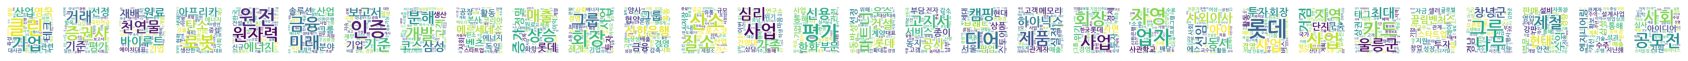

In [20]:
wordcloud = WordCloud(
    font_path=font_path,   
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white",
    random_state=0
)


plt.figure(figsize=(30,5))

for index in range(30) :  
    value = count_matrix[index].toarray().squeeze()
    key = count_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1,30, index+1)
    plt.imshow(cloud)
    plt.axis('off')

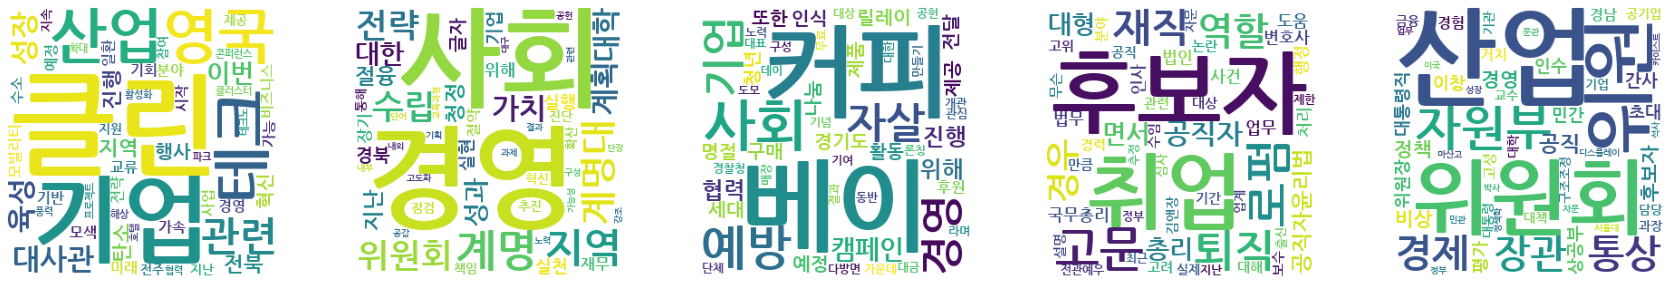

In [21]:
wordcloud = WordCloud(
    font_path=font_path,   
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white",
    random_state=0
)


plt.figure(figsize=(30,5))

for index in range(5) :  
    value = count_matrix[-index].toarray().squeeze()
    key = count_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1,5, index+1)
    plt.imshow(cloud)
    plt.axis('off')

### 2) Using TfidfVectorizer

In [22]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)

tfidf_matrix = tfidf_vectorizer.fit_transform(news['Article'])

In [23]:
print('▶ 사용된 전체 단어 수 = ', len(list(tfidf_vectorizer.vocabulary_)))     # 문서에서 사용된 전체 단어 수를 확인 
print()

print(tfidf_vectorizer.get_feature_names()[ : 20])   # 알파벳 순서대로 처음 단어 20개 출력하기 
print()

print(tfidf_vectorizer.get_feature_names()[::-1][ : 20])   # 끝에서 부터 20개 단어 출력하기 
print()

print(list(tfidf_vectorizer.vocabulary_)[:100])    # 전체 단어를 list 타입으로 변환한 후 100개만 선택 출력 (출현하는 순서부터)

▶ 사용된 전체 단어 수 =  5814

['가가', '가게', '가격', '가계', '가계부채', '가공', '가구', '가기', '가까이', '가능', '가능성', '가동', '가량', '가려움', '가로', '가맹', '가미', '가방', '가사', '가산']

['힝클리', '희천', '희소식', '희비', '희망이', '희망버스', '희망', '희귀', '흥망', '흡수', '흑자', '흐름', '휴비스', '휴먼', '휴대폰', '휠체어', '휜다', '휘민', '훼손', '훌쩍']

['영국', '대사관', '전북', '테크노', '파크', '탄소', '산업', '혁신', '관련', '육성', '미래', '클린', '성장', '가속', '협력', '기회', '모색', '테크', '비즈니스', '콘퍼런스', '진행', '지난', '전주', '호텔', '이번', '행사', '지역', '기업', '프로젝트', '일환', '기반', '수소', '해상', '풍력', '모빌리티', '분야', '참여', '시작', '전략', '클러스터', '교류', '확대', '사업', '지속', '가능', '경영', '활성화', '지원', '제공', '예정', '임종', '디자인', '기자', '사진', '환경', '사회', '지배구조', '분석', '보고서', '증권사', '국민연금', '거래', '선정', '고지', '차지', '가능성', '발간', '수가', '가점', '부여', '내용', '국내', '주식', '기준', '시행', '투자', '확산', '위해', '운용', '요인', '고려', '방안', '마련', '그간', '천명', '기금', '본부', '통해', '일반', '평가', '사이버', '인덱스', '홈페이지', '게시', '만점', '체크', '리스트', '점수', '기재', '현행']


In [24]:
tfidf_matrix[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [25]:
tfidf_matrix[0].toarray().shape

(1, 5814)

In [26]:
tfidf_matrix[0].toarray().squeeze()

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
tfidf_matrix[0].toarray().squeeze().shape

(5814,)

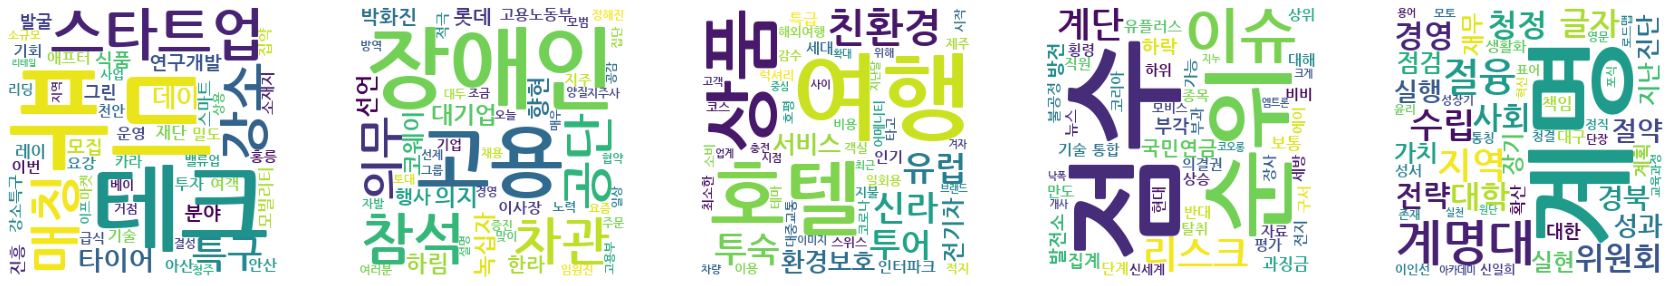

In [28]:
wordcloud = WordCloud(
    font_path=font_path,             
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white",
    random_state=0
)


plt.figure(figsize=(30,5))

for i, index in enumerate( [40, 80, 120, 160, 199] ) :   #  선정된 5개 문서의 핵심어를 출력 
    value = tfidf_matrix[index].toarray().squeeze()
    key = tfidf_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1, 5, i+1)
    plt.imshow(cloud)
    plt.axis('off')
 
                 